In [487]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [488]:
df=pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [489]:
df.shape

(1470, 35)

In [490]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [491]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No Null Values are present in columns

In [492]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [493]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

1. There are 1470 rows and 35 columns in dataset
2. 26 columns are of datatype int whereas 9 columns are of object datatype
3. There are nonull values in dataset

Summary Statistics

In [494]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


observations:
    
    1. There is very large difference in Q3 and max of Yearswithcurrmanager,YearsSinceLastPromotion,YearsInCurrentRole,YearsAtCompany,TotalWorkingYears. So there may be outliers in these columns.
    2. Standard deviation is highest in EmployeeNumber and DailyRate

In [495]:
cor=df.corr()
cor

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


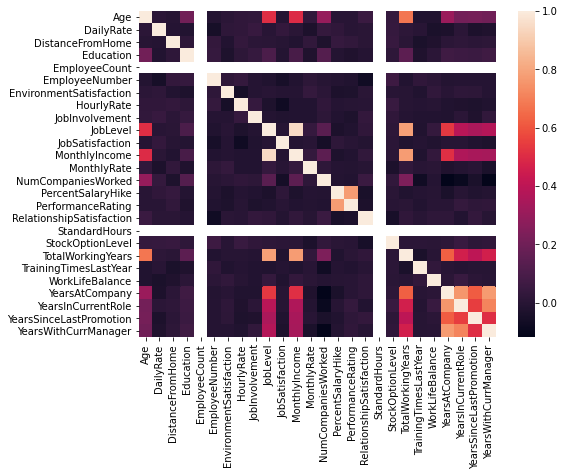

In [496]:
plt.figure(figsize=(8,6))
sns.heatmap(cor)

observations:
    
    1. Job level, monthlyincome are highy correlated with totalworkingyears. Also yearsatcompany is highly correlated with years with current manager and years in current role so i will remove these columns.
    2. There is no relationship available in employeecount and standardhours columns so i will remove these as well.
  

In [498]:
df.shape

(1470, 35)

In [499]:
df_num = df[['Age','DailyRate','DistanceFromHome','EnvironmentSatisfaction', 'HourlyRate','JobInvolvement', 'JobLevel','JobSatisfaction','RelationshipSatisfaction','StockOptionLevel','TrainingTimesLastYear']].copy()

In [534]:
df_num.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear
0,41,1102,1,2,94,3,2,4,1,0,0
1,49,279,8,3,61,2,2,2,4,1,3
2,37,1373,2,4,92,2,1,3,2,0,3
3,33,1392,3,4,56,3,1,3,3,0,3
4,27,591,2,1,40,3,1,2,4,1,3


In [503]:
df_cat=df[['Attrition', 'BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus', 'OverTime','MonthlyRate','Over18']].copy()

In [504]:
df_cat.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,MonthlyRate,Over18
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,19479,Y
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,24907,Y
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,2396,Y
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,23159,Y
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,16632,Y


In [505]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_cat['Attrition']=le.fit_transform(df_cat['Attrition'])

Univariate-Analysis

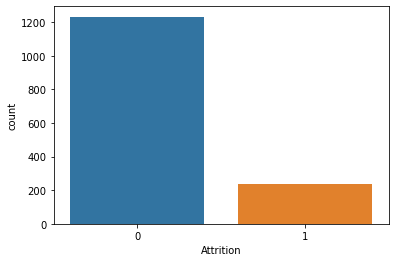

In [506]:
sns.countplot(df_cat['Attrition'])
plt.show()

Above plot shows that the number of working employees is much higher than that of the  ex-employees (Approx 6 times)

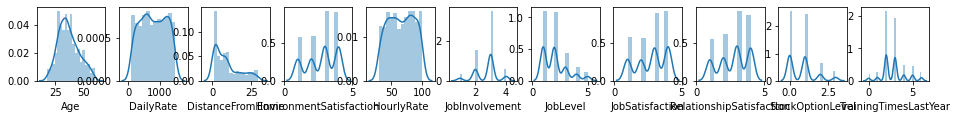

In [592]:
plt.figure(figsize=(16,16))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

From above plot we observe that Age is slightly right skewed,Distance from home is highly right skewed. So these indicate that more the age and distance from home also has major role in employee retention. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002E1294FAE50>,
      dtype=object)

<Figure size 576x432 with 0 Axes>

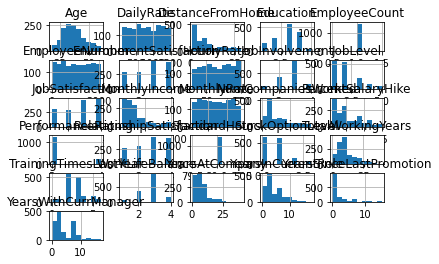

In [616]:
plt.figure(figsize=(8,6))
df.hist()

observations:
    
    1.Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old
    2.EmployeeCount and StandardHours are constant values for all employees. They’re likely to be redundant features.
    3.Employee Number is likely to be a unique identifier for employees given the feature’s quasi-uniform distribution

Bivariate-Analysis

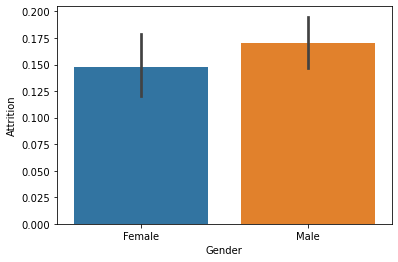

In [507]:
sns.barplot(x='Gender',y='Attrition',data=df_cat)
plt.show()

Above plot shows male attrition is slightly greater than that of female

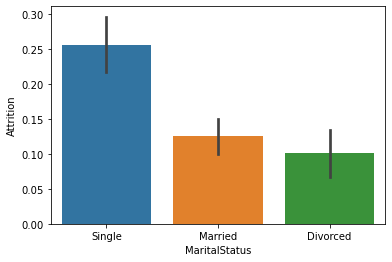

In [508]:
sns.barplot(x='MaritalStatus',y='Attrition',data=df_cat)
plt.show()

Above plot shows single employee and divorsed employee are highest and lowest contributors respectively towards attrition 

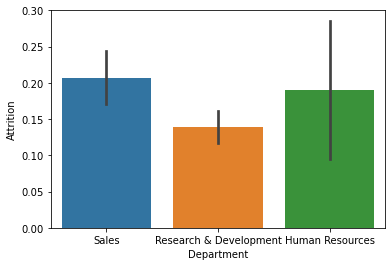

In [509]:
sns.barplot(x='Department',y='Attrition',data=df_cat)
plt.show()

Above plot shows Sales emplyees are the highest out of the overall ex-employees of the company

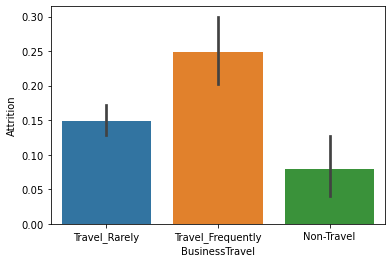

In [510]:
sns.barplot(x='BusinessTravel',y='Attrition',data=df_cat)
plt.show()

Above plot show level of travel is one of the major factor towards employee's work life in company. Employee with frequent business travel were highest in leavers as compared to its other two counterparts

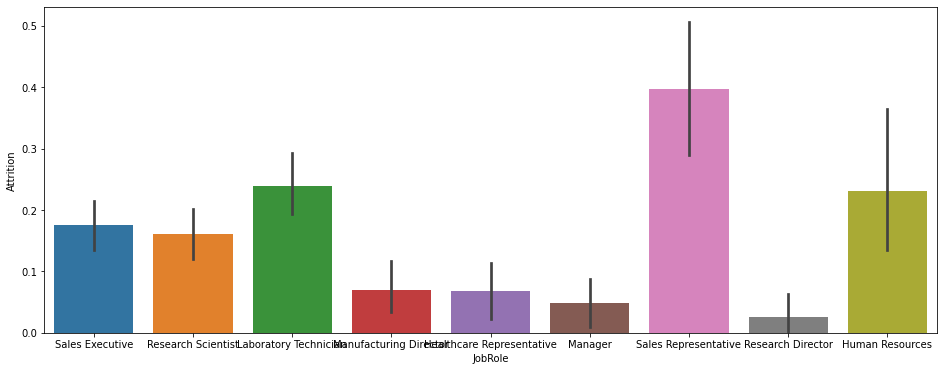

In [511]:
plt.figure(figsize=(16,6))
sns.barplot(x='JobRole',y='Attrition',data=df_cat)
plt.show()

Above plot shows Sales Representive and Research Director are the highest and lowest job leaving roles respectively.

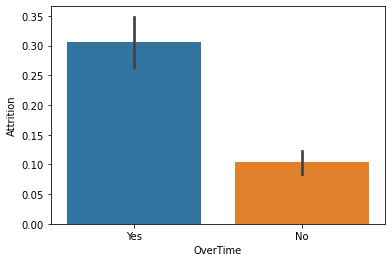

In [512]:
sns.barplot(x='OverTime',y='Attrition',data=df_cat)
plt.show()

Above plot shows Overtime is also a one of the major factor behind attrition. Employee with overtime issue tend to leave company mostly

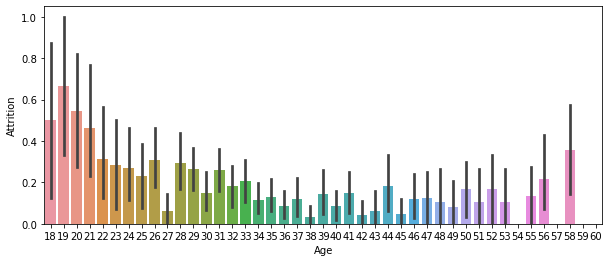

In [545]:
plt.figure(figsize=(10,4))
sns.barplot(x='Age',y='Attrition',data=df_final)
plt.show()

From above plot we observe that the attrition rate is very high among the employees of age range 18-28 then it decreases but increases after 50's

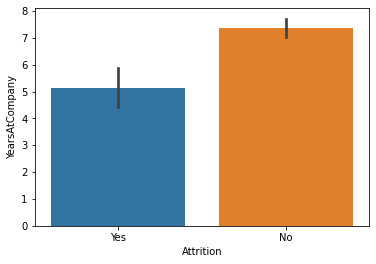

In [554]:
sns.barplot(x='Attrition',y='YearsAtCompany',data=df)
plt.show()

From above plot we observe employees having experience less than 5 years in the same company are more prone to attrition than employees with experience more than 5 years.

In [513]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in df_cat.columns:
    df_cat[i]=le.fit_transform(df_cat[i])

In [514]:
df_cat

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,MonthlyRate,Over18
0,1,2,2,1,0,7,2,1,999,0
1,0,1,1,1,1,6,1,0,1328,0
2,1,2,1,4,1,2,2,1,18,0
3,0,1,1,1,0,6,1,1,1228,0
4,0,2,1,3,1,2,1,0,846,0
...,...,...,...,...,...,...,...,...,...,...
1465,0,1,1,3,1,2,1,0,599,0
1466,0,2,1,3,1,0,1,0,1123,0
1467,0,2,1,1,1,4,1,1,175,0
1468,0,1,2,3,1,7,1,0,641,0


In [515]:
df_final=pd.concat([df_num,df_cat],axis=1)
df_final.head()

,Age,DailyRate,DistanceFromHome,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,RelationshipSatisfaction,StockOptionLevel,...,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,MonthlyRate,Over18
0,41,1102,1,2,94,3,2,4,1,0,...,1,2,2,1,0,7,2,1,999,0
1,49,279,8,3,61,2,2,2,4,1,...,0,1,1,1,1,6,1,0,1328,0
2,37,1373,2,4,92,2,1,3,2,0,...,1,2,1,4,1,2,2,1,18,0
3,33,1392,3,4,56,3,1,3,3,0,...,0,1,1,1,0,6,1,1,1228,0
4,27,591,2,1,40,3,1,2,4,1,...,0,2,1,3,1,2,1,0,846,0


In [516]:
df_final.shape

(1470, 21)

Detecting Outliers

Age                            AxesSubplot(0.125,0.536818;0.0596154x0.343182)
DailyRate                   AxesSubplot(0.196538,0.536818;0.0596154x0.343182)
DistanceFromHome            AxesSubplot(0.268077,0.536818;0.0596154x0.343182)
EnvironmentSatisfaction     AxesSubplot(0.339615,0.536818;0.0596154x0.343182)
HourlyRate                  AxesSubplot(0.411154,0.536818;0.0596154x0.343182)
JobInvolvement              AxesSubplot(0.482692,0.536818;0.0596154x0.343182)
JobLevel                    AxesSubplot(0.554231,0.536818;0.0596154x0.343182)
JobSatisfaction             AxesSubplot(0.625769,0.536818;0.0596154x0.343182)
RelationshipSatisfaction    AxesSubplot(0.697308,0.536818;0.0596154x0.343182)
StockOptionLevel            AxesSubplot(0.768846,0.536818;0.0596154x0.343182)
TrainingTimesLastYear       AxesSubplot(0.840385,0.536818;0.0596154x0.343182)
Attrition                         AxesSubplot(0.125,0.125;0.0596154x0.343182)
BusinessTravel                 AxesSubplot(0.196538,0.125;0.0596

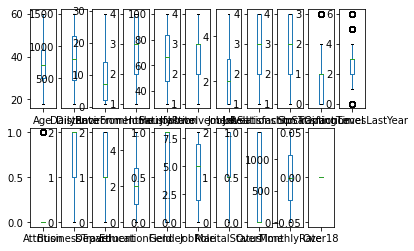

In [557]:
df_final.plot(kind='box',subplots=True,layout=(2,11))

From above plots we can see that there are some outliers present in few columns.

In [ ]:
collist=df_num.columns.values
ncol=11
nrows=10

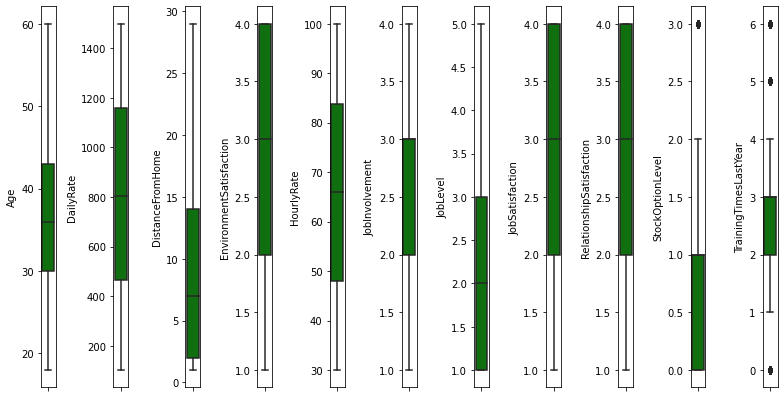

In [566]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_num[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [518]:
x=df_final.drop('Attrition',axis=1)
x.shape

(1470, 20)

In [519]:
y=df_final['Attrition']

In [520]:
x.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TrainingTimesLastYear       0.553124
BusinessTravel             -1.439006
Department                  0.172231
EducationField              0.550371
Gender                     -0.408665
JobRole                    -0.357270
MaritalStatus              -0.152175
OverTime                    0.964489
MonthlyRate                 0.012315
Over18                      0.000000
dtype: float64

In [521]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
x=pt.fit_transform(x)
x=pd.DataFrame(x)

In [522]:
x.skew()

0    -0.007603
1    -0.196160
2    -0.007468
3    -0.205395
4    -0.106461
5    -0.020365
6     0.103624
7    -0.212815
8    -0.193634
9     0.087019
10    0.058058
11   -0.970506
12    0.013801
13   -0.008386
14   -0.408665
15   -0.319659
16   -0.156911
17    0.964489
18   -0.285494
19    0.000000
dtype: float64

In [523]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

Hyper parameter tuning

In [524]:
max_accuracy_score=0.80
for r_state in range(42,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.25)
    lr=LogisticRegression()
    dtc=DecisionTreeClassifier()
    svc=SVC()
    knn=KNeighborsClassifier()
    gnb=GaussianNB()
    model=[lr,dtc,svc,knn,gnb]
    for m in model:
        m.fit(x_train,y_train)
        m.score(x_train,y_train)
        y_pred=m.predict(x_test)
        acc_scr=accuracy_score(y_test,y_pred)
        if acc_scr>max_accuracy_score:
            max_accuracy_score=acc_scr
            final_r_state=r_state        
            print('max accuracy score corresponding to ',m,'for',final_r_state,'is',max_accuracy_score)

max accuracy score corresponding to  LogisticRegression() for 42 is 0.8831521739130435
max accuracy score corresponding to  SVC() for 42 is 0.8885869565217391
max accuracy score corresponding to  LogisticRegression() for 78 is 0.8940217391304348
max accuracy score corresponding to  GaussianNB() for 78 is 0.8994565217391305


In [525]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=78,test_size=0.25)

In [526]:
print(x_train.shape,'\t',x_test.shape)

(1102, 20) 	 (368, 20)


In [527]:
print(y_train.shape,'\t',y_test.shape)

(1102,) 	 (368,)


In [528]:
model=[lr,dtc,svc,knn,gnb]
for m in model:
    m.fit(x_train,y_train)
    print('Score of',m,'is:',m.score(x_train,y_train))
    y_pred=m.predict(x_test)
    print('accuracy score:',accuracy_score(y_test,y_pred))
    print('confusion_matrix:',confusion_matrix(y_test,y_pred))
    print('classification_report:',(y_test,y_pred))
    print('\n')

Score of LogisticRegression() is: 0.8593466424682396
accuracy score: 0.8940217391304348
confusion_matrix: [[317   4]
 [ 35  12]]
classification_report: (471     0
1090    0
441     0
979     0
1085    1
       ..
489     0
574     0
361     0
68      0
1126    0
Name: Attrition, Length: 368, dtype: int64, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

GridSearch CV

In [644]:
from sklearn.model_selection import GridSearchCV
dtc=DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini'}
0.7904761904761906


In [645]:
parameters={'kernel':['linear','rbf'],'C':[1,10]}
gd_sr=GridSearchCV(estimator=svc,param_grid=parameters,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'C': 1, 'kernel': 'rbf'}
0.8578231292517007


From above metrics and scores we can see that there is tough competition between LogisticRegression, SVC(), KNN and GaussianNB for the best model so, let us check by cross validation.

Cross Validation For Models

In [529]:
from sklearn.model_selection import cross_val_score
model=[lr,dtc,svc,knn,gnb]
for m in model:
    mscores=cross_val_score(m,x,y,cv=5,scoring='accuracy')
    print(mscores)
    print('mean score and standard deviation of',m,'is',mscores.mean(),mscores.std())
    print('\n')

[0.88435374 0.85034014 0.86054422 0.84353741 0.87414966]
mean score and standard deviation of LogisticRegression() is 0.8625850340136054 0.014996875976223529


[0.80952381 0.79251701 0.81632653 0.75510204 0.79931973]
mean score and standard deviation of DecisionTreeClassifier() is 0.7945578231292516 0.021360977507629386


[0.86394558 0.84693878 0.85714286 0.8537415  0.86734694]
mean score and standard deviation of SVC() is 0.8578231292517007 0.0072633185387967845


[0.84353741 0.83673469 0.86054422 0.8537415  0.85034014]
mean score and standard deviation of KNeighborsClassifier() is 0.8489795918367348 0.008219759165710553


[0.89795918 0.82993197 0.83673469 0.85034014 0.88435374]
mean score and standard deviation of GaussianNB() is 0.8598639455782313 0.02673045265903196




From above we can see LogisticRegression and GaussianNB() are having mean score slightly higher than others.

AUC ROC output classification analysis

In [633]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [637]:
model=[lr,dtc,svc,knn,gnb]
y_pred_prob=lr.predict_proba(x_test)[:,1]

In [621]:
y_pred_prob

array([0.03134356, 0.19027325, 0.0976124 , 0.1292194 , 0.10970252,
       0.28072645, 0.05882686, 0.00862798, 0.01108476, 0.17403707,
       0.08935324, 0.13863941, 0.15369646, 0.04938341, 0.20610178,
       0.0173577 , 0.08518249, 0.48150564, 0.33422448, 0.03518827,
       0.48039858, 0.0242879 , 0.66696982, 0.19825989, 0.03283889,
       0.0188188 , 0.26493637, 0.08971073, 0.33780552, 0.17303232,
       0.33978726, 0.05826384, 0.00794362, 0.02543347, 0.53453302,
       0.03272581, 0.01956   , 0.01117169, 0.28360515, 0.41208674,
       0.0137417 , 0.32559191, 0.00710383, 0.3665302 , 0.07843027,
       0.37692585, 0.01287232, 0.15771786, 0.03551522, 0.17279568,
       0.10985151, 0.02894853, 0.03329822, 0.01859766, 0.10217546,
       0.31156639, 0.14128376, 0.03405887, 0.06778982, 0.05871569,
       0.13823802, 0.07209116, 0.18255727, 0.08421219, 0.02129897,
       0.12668352, 0.23682735, 0.22938235, 0.03359412, 0.18975296,
       0.07741441, 0.01606165, 0.10281368, 0.01533903, 0.14554

In [622]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
thresholds

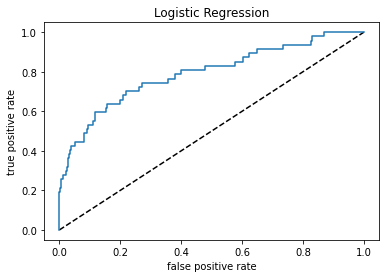

In [626]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Logistic Regression')
plt.show()

In [628]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))
auc_score

0.6214290448730695

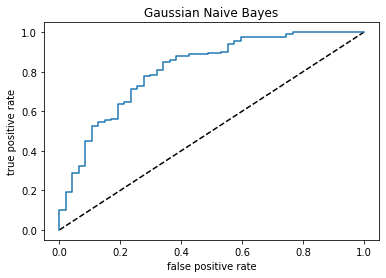

0.688108967985683

In [639]:
y_pred_prob=gnb.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Gaussian Naive Bayes')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Gaussian Naive Bayes')
plt.show()
auc_score=roc_auc_score(y_test,gnb.predict(x_test))
auc_score

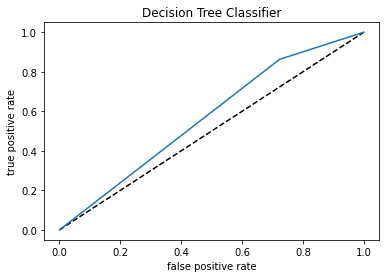

0.5697620467952542

In [640]:
y_pred_prob=dtc.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision Tree Classifier')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Decision Tree Classifier')
plt.show()
auc_score=roc_auc_score(y_test,dtc.predict(x_test))
auc_score

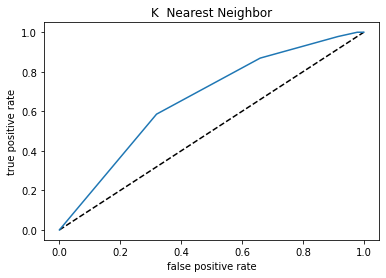

0.5316497646980843

In [642]:
y_pred_prob=knn.predict_proba(x_test)[:,0]
tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='K  Nearest Neighbor')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('K  Nearest Neighbor')
plt.show()
auc_score=roc_auc_score(y_test,knn.predict(x_test))
auc_score

From above AUC-ROC output classification capability analysis we can observe that GaussianNB model has highiest auc_score

From above cross validation score and AUC-ROC analysis ,still both LogisticRegression and GaussianNB are in neck to neck competition

Let's try ensembling techniques and see which technique will work best

Ensebling Techniques for boosting score

In [530]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,random_state=78)
rf.fit(x_train,y_train)
print(rf.score(x_train,y_train))
predrf=rf.predict(x_test)
print('accuracy score:',accuracy_score(y_test,y_pred))
print('confusion_matrix:',confusion_matrix(y_test,y_pred))
print('classification_report:',(y_test,y_pred))

1.0
accuracy score: 0.8994565217391305
confusion_matrix: [[312   9]
 [ 28  19]]
classification_report: (471     0
1090    0
441     0
979     0
1085    1
       ..
489     0
574     0
361     0
68      0
1126    0
Name: Attrition, Length: 368, dtype: int64, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

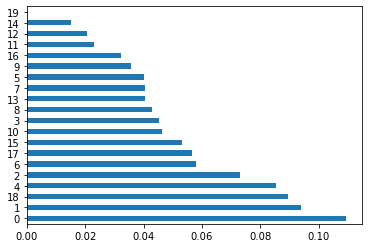

In [539]:
rf=RandomForestClassifier(n_estimators=100,random_state=78)
rf.fit(x_train,y_train)
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind='barh')

from above table we observe that Age is the most predictive feature out of all inputs

In [531]:
from sklearn.model_selection import cross_val_score
rfscores=cross_val_score(rf,x,y,cv=5,scoring='accuracy')
print(rfscores)
print(rfscores.mean(),rfscores.std())

[0.8537415  0.86394558 0.85714286 0.84693878 0.87414966]
0.8591836734693878 0.009277674623799883


In [532]:
from sklearn.ensemble import AdaBoostClassifier
model=[lr,dtc,svc,gnb]
for m in model:
    ad=AdaBoostClassifier(base_estimator=m,n_estimators=100,learning_rate=0.1,random_state=78,algorithm='SAMME')
    ad.fit(x_train,y_train)
    print(m)
    print(ad.score(x_train,y_train))
    ad_pred=ad.predict(x_test)
    print('accuracy score:',accuracy_score(y_test,y_pred))
    print('confusion_matrix:',confusion_matrix(y_test,y_pred))
    print('classification_report:',(y_test,y_pred))
    print('\n')

LogisticRegression()
0.852994555353902
accuracy score: 0.8994565217391305
confusion_matrix: [[312   9]
 [ 28  19]]
classification_report: (471     0
1090    0
441     0
979     0
1085    1
       ..
489     0
574     0
361     0
68      0
1126    0
Name: Attrition, Length: 368, dtype: int64, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [533]:
from sklearn.model_selection import cross_val_score
adscores=cross_val_score(ad,x,y,cv=5,scoring='accuracy')
print(adscores)
print(adscores.mean(),adscores.std())

[0.9047619  0.84013605 0.84693878 0.84353741 0.89115646]
0.8653061224489796 0.027091575172435184


Saving Random Forest Classifier Model.

In [647]:
import joblib
file='HRanalyticsrfc.obj'
joblib.dump(rf,file)

['HRanalyticsrfc.obj']

Conclusions:
    
    1.Here from above Data Analysis and Modelling I have seen that logisticRegression and GaussianNB models were in competition till end.
    2.Then I used ensembling techniques and found out that Random forest classifier worked very good but also observed that Adaboost model (DTC and GNB) was working good.
    3.Here I have saved saved RandomForest Classifier for future prediction.